#QUESTION 1

##Step 1. Import the necessary libraries

In [6]:
import pandas as pd

##Step 2. Import the dataset from this address.

##Step 3. Assign it to a variable called users.

In [7]:
users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user", sep = "|")
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


##Step 4. Discover what is the mean age per occupation

In [8]:
users.groupby("occupation").age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [9]:
users.rename(columns={"sex":"gender"}, inplace=True)

##Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [10]:
genders = users.groupby("occupation")["gender"].value_counts(normalize=True)*100
genders.head()

occupation     gender
administrator  M          54.430380
               F          45.569620
artist         M          53.571429
               F          46.428571
doctor         M         100.000000
Name: gender, dtype: float64

In [11]:
gendersn = pd.DataFrame(genders)
gendersn.rename(columns={"gender":"percent"}, inplace=True)
gendersn.head()

percent
occupation    gender            
administrator M        54.430380
              F        45.569620
artist        M        53.571429
              F        46.428571
doctor        M       100.000000

In [12]:
new_gen = pd.DataFrame(gendersn.reset_index(level=["occupation", "gender"]))
new_gen.head()

,occupation,gender,percent
0,administrator,M,54.430380
1,administrator,F,45.569620
2,artist,M,53.571429
3,artist,F,46.428571
4,doctor,M,100.000000


In [13]:
males = new_gen[new_gen["gender"] == "M"].sort_values(by="percent",ascending=False)
males

,occupation,gender,percent
4,doctor,M,100.000000
7,engineer,M,97.014925
37,technician,M,96.296296
29,retired,M,92.857143
27,programmer,M,90.909091
11,executive,M,90.625000
33,scientist,M,90.322581
9,entertainment,M,88.888889
17,lawyer,M,83.333333
31,salesman,M,75.000000


##Step 6. For each occupation, calculate the minimum and maximum ages

In [14]:
users.groupby("occupation").age.agg([min, max])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


##Step 7. For each combination of occupation and gender, calculate the mean age

In [15]:
users.groupby(["occupation", "gender"]).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

##Step 8. For each occupation present the percentage of women and men

In [16]:
new_gen

,occupation,gender,percent
0,administrator,M,54.430380
1,administrator,F,45.569620
2,artist,M,53.571429
3,artist,F,46.428571
4,doctor,M,100.000000
5,educator,M,72.631579
6,educator,F,27.368421
7,engineer,M,97.014925
8,engineer,F,2.985075
9,entertainment,M,88.888889


#QUESTION 2

##Step 1. Import the necessary libraries

In [17]:
import pandas as pd

##Step 2. Import the dataset from this address.

##Step 3. Assign it to a variable called euro12.

In [18]:
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv', sep=',')
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


##Step 4. Select only the Goal column.

In [19]:
euro12.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

##Step 5. How many team participated in the Euro2012?

In [20]:
euro12.shape[0]

16

##Step 6. What is the number of columns in the dataset?

In [21]:
euro12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Team                        16 non-null     object 
 1   Goals                       16 non-null     int64  
 2   Shots on target             16 non-null     int64  
 3   Shots off target            16 non-null     int64  
 4   Shooting Accuracy           16 non-null     object 
 5   % Goals-to-shots            16 non-null     object 
 6   Total shots (inc. Blocked)  16 non-null     int64  
 7   Hit Woodwork                16 non-null     int64  
 8   Penalty goals               16 non-null     int64  
 9   Penalties not scored        16 non-null     int64  
 10  Headed goals                16 non-null     int64  
 11  Passes                      16 non-null     int64  
 12  Passes completed            16 non-null     int64  
 13  Passing Accuracy            16 non-nu

##Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [22]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


##Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [23]:
discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending = False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


##Step 9. Calculate the mean Yellow Cards given per Team

In [24]:
round(discipline['Yellow Cards'].mean())

7

##Step 10. Filter teams that scored more than 6 goals

In [25]:
euro12[euro12.Goals > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


##Step 11. Select the teams that start with G

In [26]:
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


##Step 12. Select the first 7 columns

In [27]:
euro12.iloc[: , 0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


##Step 13. Select all columns except the last 3.

In [28]:
euro12.iloc[: , :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


##Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [29]:
euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


#QUESTION 3

##Step 1. Import the necessary libraries

In [30]:
import pandas as pd
import numpy as np

##Step 2. Create 3 differents Series, each of length 100, as follows:

In [31]:
s1 = pd.Series(np.random.randint(1, high=5, size=100, dtype='l'))
s2 = pd.Series(np.random.randint(1, high=4, size=100, dtype='l'))
s3 = pd.Series(np.random.randint(10000, high=30001, size=100, dtype='l'))

print(s1, s2, s3)

0     4
1     4
2     4
3     3
4     2
     ..
95    1
96    2
97    4
98    3
99    1
Length: 100, dtype: int64 0     3
1     1
2     1
3     2
4     2
     ..
95    3
96    3
97    3
98    2
99    3
Length: 100, dtype: int64 0     24301
1     20802
2     29059
3     29051
4     14705
      ...  
95    11321
96    21611
97    19489
98    20649
99    10491
Length: 100, dtype: int64


##Step 3. Let's create a DataFrame by joinning the Series by column

In [32]:
housemkt = pd.concat([s1, s2, s3], axis=1)
housemkt.head()

,0,1,2
0,4,3,24301
1,4,1,20802
2,4,1,29059
3,3,2,29051
4,2,2,14705


##Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [33]:
housemkt.rename(columns = {0: 'bedrs', 1: 'bathrs', 2: 'price_sqr_meter'}, inplace=True)
housemkt.head()

,bedrs,bathrs,price_sqr_meter
0,4,3,24301
1,4,1,20802
2,4,1,29059
3,3,2,29051
4,2,2,14705


##Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [34]:
bigcolumn = pd.concat([s1, s2, s3], axis=0)
bigcolumn = bigcolumn.to_frame()
print(type(bigcolumn))

bigcolumn

<class 'pandas.core.frame.DataFrame'>


,0
0,4
1,4
2,4
3,3
4,2
...,...
95,11321
96,21611
97,19489
98,20649


##Step 6. Oops, it seems it is going only until index 99. Is it true?

In [35]:
len(bigcolumn)

300

##Step 7. Reindex the DataFrame so it goes from 0 to 299

In [36]:
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

,0
0,4
1,4
2,4
3,3
4,2
...,...
295,11321
296,21611
297,19489
298,20649


#QUESTION 4

##Step 1. Import the necessary libraries

In [37]:
import pandas as pd
import numpy as np
import datetime as dt

##Step 2. Import the dataset from this address

##Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [ ]:
data = pd.read_csv("wind.data")
data["Date"] = pd.to_datetime(data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1))
data = data.drop(columns=["Yr","Mo","Dy"])
data.head()

##Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [ ]:
data["Date"] = np.where(pd.DatetimeIndex(data["Date"]).year < 2000,data.Date,data.Date - pd.offsets.DateOffset(years=100))

##Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [ ]:
newData = data.set_index("Date")
newData.index.astype("datetime64[ns]")

##Step 6. Compute how many values are missing for each location over the entire record.

In [ ]:
print(newData.isnull().values.ravel().sum())

##Step 7. Compute how many non-missing values there are in total.

In [ ]:
x=newData.count()
print("Total Non-missing values are :",x.sum())

##Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.

In [ ]:
y = newData.mean()
y.mean()

##Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days

In [ ]:
def stats(x):
  x = pd.Series(x)
  Min = x.min()
  Max = x.max()
  Mean = x.mean()
  Std = x.std()
  res = [Min,Max,Mean,Std]
  indx = ["Min","Max","Mean","Std"]
  res = pd.Series(res,index=indx)
  return res
loc_stats = newData.apply(stats)
loc_stats

##Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

In [ ]:
day_stats = newData.apply(stats,axis=1)
day_stats.head()

##Step 11. Find the average windspeed in January for each location.

In [ ]:
january_data = newData[newData.index.month == 1]
print ("January windspeeds:")
print (january_data.mean())

##Step 12. Downsample the record to a yearly frequency for each location.

In [ ]:
print( "Yearly:\n", newData.resample('A').mean())

##Step 13. Downsample the record to a monthly frequency for each location.

In [ ]:
print ("Monthly:", newData.resample('M').mean())

##Step 14. Downsample the record to a weekly frequency for each location.

In [ ]:
print ("Weekly:", newData.resample('W').mean())

##Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [ ]:
newdata = newData.groupby(lambda d: (d.month, d.year))
print ("Mean wind speed for each month in each location")
print (newdata.mean())

In [ ]:
first_year = newData[newData.index.year == 1961]
stats1 = newData.resample('W').mean().apply(lambda x: x.describe())
print (stats1)

#QUESTION 5

##Step 1. Import the necessary libraries

In [39]:
import pandas as pd

##Step 2. Import the dataset from this address.

##Step 3. Assign it to a variable called chipo.

In [40]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')

##Step 4. See the first 10 entries

In [41]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


##Step 5. What is the number of observations in the dataset?

In [43]:
chipo.shape[0]

4622

In [42]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


##Step 6. What is the number of columns in the dataset?

In [44]:
chipo.shape[1]

5

##Step 7. Print the name of all the columns.

In [45]:
chipo.columns.values

array(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'], dtype=object)

##Step 8. How is the dataset indexed?

In [46]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

##Step 9. Which was the most-ordered item?

In [47]:
chipo.item_name.nunique()

50

In [48]:
chipo.item_name.value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

In [49]:
chipo.groupby(['item_name']).quantity.sum().sort_values(ascending = False).index[0]

'Chicken Bowl'

In [50]:
chipo.groupby('item_name').sum().sort_values(['quantity'], ascending=False).head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


##Step 10. For the most-ordered item, how many items were ordered?

In [51]:
chipo.groupby(['item_name']).quantity.sum().sort_values(ascending = False).values[0]

761

In [52]:
chipo.groupby('item_name').sum().sort_values(['quantity'], ascending=False).head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


##Step 11. What was the most ordered item in the choice_description column?

In [53]:
chipo.groupby(['choice_description']).quantity.sum().sort_values(ascending = False).index[0]

'[Diet Coke]'

In [54]:
chipo.groupby('choice_description').sum().sort_values(['quantity'], ascending=False).head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


##Step 12. How many items were orderd in total?

In [55]:
chipo.quantity.sum()

4972

##Step 13. Turn the item price into a float

###Step 13.a. Check the item price type

In [56]:
chipo.dtypes.item_price

dtype('O')

###Step 13.b. Create a lambda function and change the type of item price

In [57]:
chipo.item_price = chipo.item_price.apply(lambda x: float(x[1:]))

###Step 13.c. Check the item price type

In [58]:
chipo.item_price.dtypes

dtype('float64')

##Step 14. How much was the revenue for the period in the dataset?

In [59]:
chipo['revenue'] = chipo['quantity']*chipo.item_price
total_revenue = chipo.revenue.sum()
total_revenue

39237.02

##Step 15. How many orders were made in the period?

In [60]:
total_order = chipo.order_id.nunique()
total_order

1834

In [61]:
chipo.order_id.value_counts().count()

1834

##Step 16. What is the average revenue amount per order?

In [62]:
total_revenue / total_order

21.39423118865867

In [63]:
order_grouped = chipo.groupby(by=['order_id']).sum()
order_grouped.mean()['revenue']

21.39423118865867

In [64]:
chipo.groupby(by=['order_id']).sum().mean()['revenue']

21.39423118865867

##Step 17. How many different items are sold?

In [65]:
chipo.item_name.nunique()

50

In [66]:
chipo.item_name.value_counts().count()

50

#QUESTION 6

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

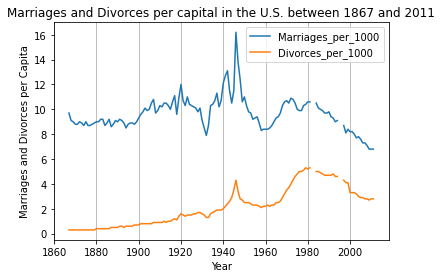

In [68]:
df = pd.read_csv('us-marriages-divorces-1867-2014.csv')

df.plot(x='Year', y=['Marriages_per_1000', 'Divorces_per_1000'])
plt.title('Marriages and Divorces per capital in the U.S. between 1867 and 2011')

# set axis labels
plt.ylabel('Marriages and Divorces per Capita')
plt.xlabel('Year')

# show grid line (optional)
plt.grid(axis='x')

# show plot
plt.show()

#QUESTION 7

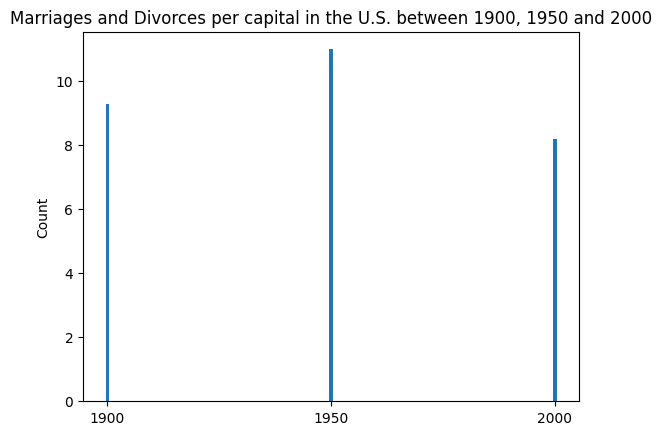

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
us_marriage_divorce_data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
us_marriage_divorce_data = us_marriage_divorce_data[
    us_marriage_divorce_data['Year'].apply(lambda x: x in [1900, 1950, 2000])]

years = us_marriage_divorce_data['Year'].values
marriages_per_capita = us_marriage_divorce_data['Marriages_per_1000'].values
divorces_per_capita = us_marriage_divorce_data['Divorces_per_1000'].values
data = {'year': years,
        'marriages_per_capita': marriages_per_capita,
        'divorces_per_capita':divorces_per_capita}
df=pd.DataFrame(data)

# Fixing random state for reproducibility
np.random.seed(19680801)
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data


ax.bar(years,marriages_per_capita)
ax.set_xticks(years)  # labels read top-to-bottom
ax.set_ylabel('Count')
ax.set_title('Marriages and Divorces per capital in the U.S. between 1900, 1950 and 2000')

plt.show()

#Question 8

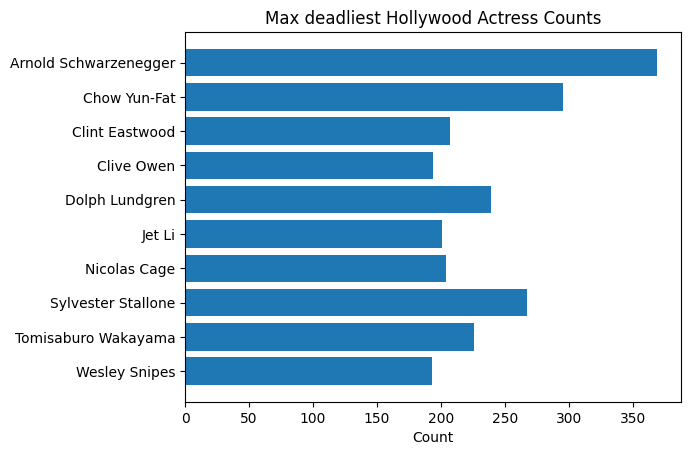

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

hollywood_actor_kills = pd.read_csv('actor_kill_counts.csv')

# Fixing random state for reproducibility
np.random.seed(19680801)
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data


ax.barh(hollywood_actor_kills['Actor'].values,hollywood_actor_kills['Count'].values,  align='center')
ax.set_yticks(hollywood_actor_kills['Actor'].values)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Max deadliest Hollywood Actress Counts')

plt.show()

#QUESTION 9

               Emperor  Length_of_Reign         Cause_of_Death
0             Augustus            40.58  Possibly assassinated
1             Tiberius            22.50  Possibly assassinated
2             Caligula             4.83           Assassinated
3             Claudius            13.75  Possibly assassinated
5                Galba             0.58           Assassinated
7            Vitellius             0.67           Assassinated
10            Domitian            15.00           Assassinated
17            Commodus            15.00           Assassinated
18            Pertinax             0.25           Assassinated
21           Caracalla            19.00           Assassinated
22                Geta             3.00           Assassinated
24          Elagabalus             3.75           Assassinated
25   Severus Alexander            13.00           Assassinated
26         Maximinus I             3.25           Assassinated
29            Pupienus             0.25           Assas

([<matplotlib.patches.Wedge at 0x7f1794a9b340>,
 [Text(5.388445916248355e-16, 8.8, 'Augustus'),
  Text(-0.06355350556839466, 8.799770505639904, 'Tiberius'),
  Text(-0.25418087519481225, 8.796328329631928, 'Caligula'),
  Text(-0.5715838525916983, 8.781417419725386, 'Claudius'),
  Text(-1.014603498093826, 8.741314531674043, 'Galba'),
  Text(-1.5802330760233507, 8.656954627664499, 'Vitellius'),
  Text(-2.2622567580796455, 8.504245666755105, 'Domitian'),
  Text(-3.0495563976684283, 8.254708097651884, 'Commodus'),
  Text(-3.924170701120674, 7.876603602344484, 'Pertinax'),
  Text(-4.859253435988567, 7.336733336085844, 'Caracalla'),
  Text(-5.817160387583082, 6.6030784506269695, 'Geta'),
  Text(-6.747994822848904, 5.648412685950311, 'Elagabalus'),
  Text(-7.589048035193822, 4.454924232747489, 'Severus Alexander'),
  Text(-8.265666264955097, 3.0197286627084967, 'Maximinus I'),
  Text(-8.694128733123023, 1.3609282023254161, 'Pupienus'),
  Text(-8.787094044773891, -0.4764223423594041, 'Balbinus'

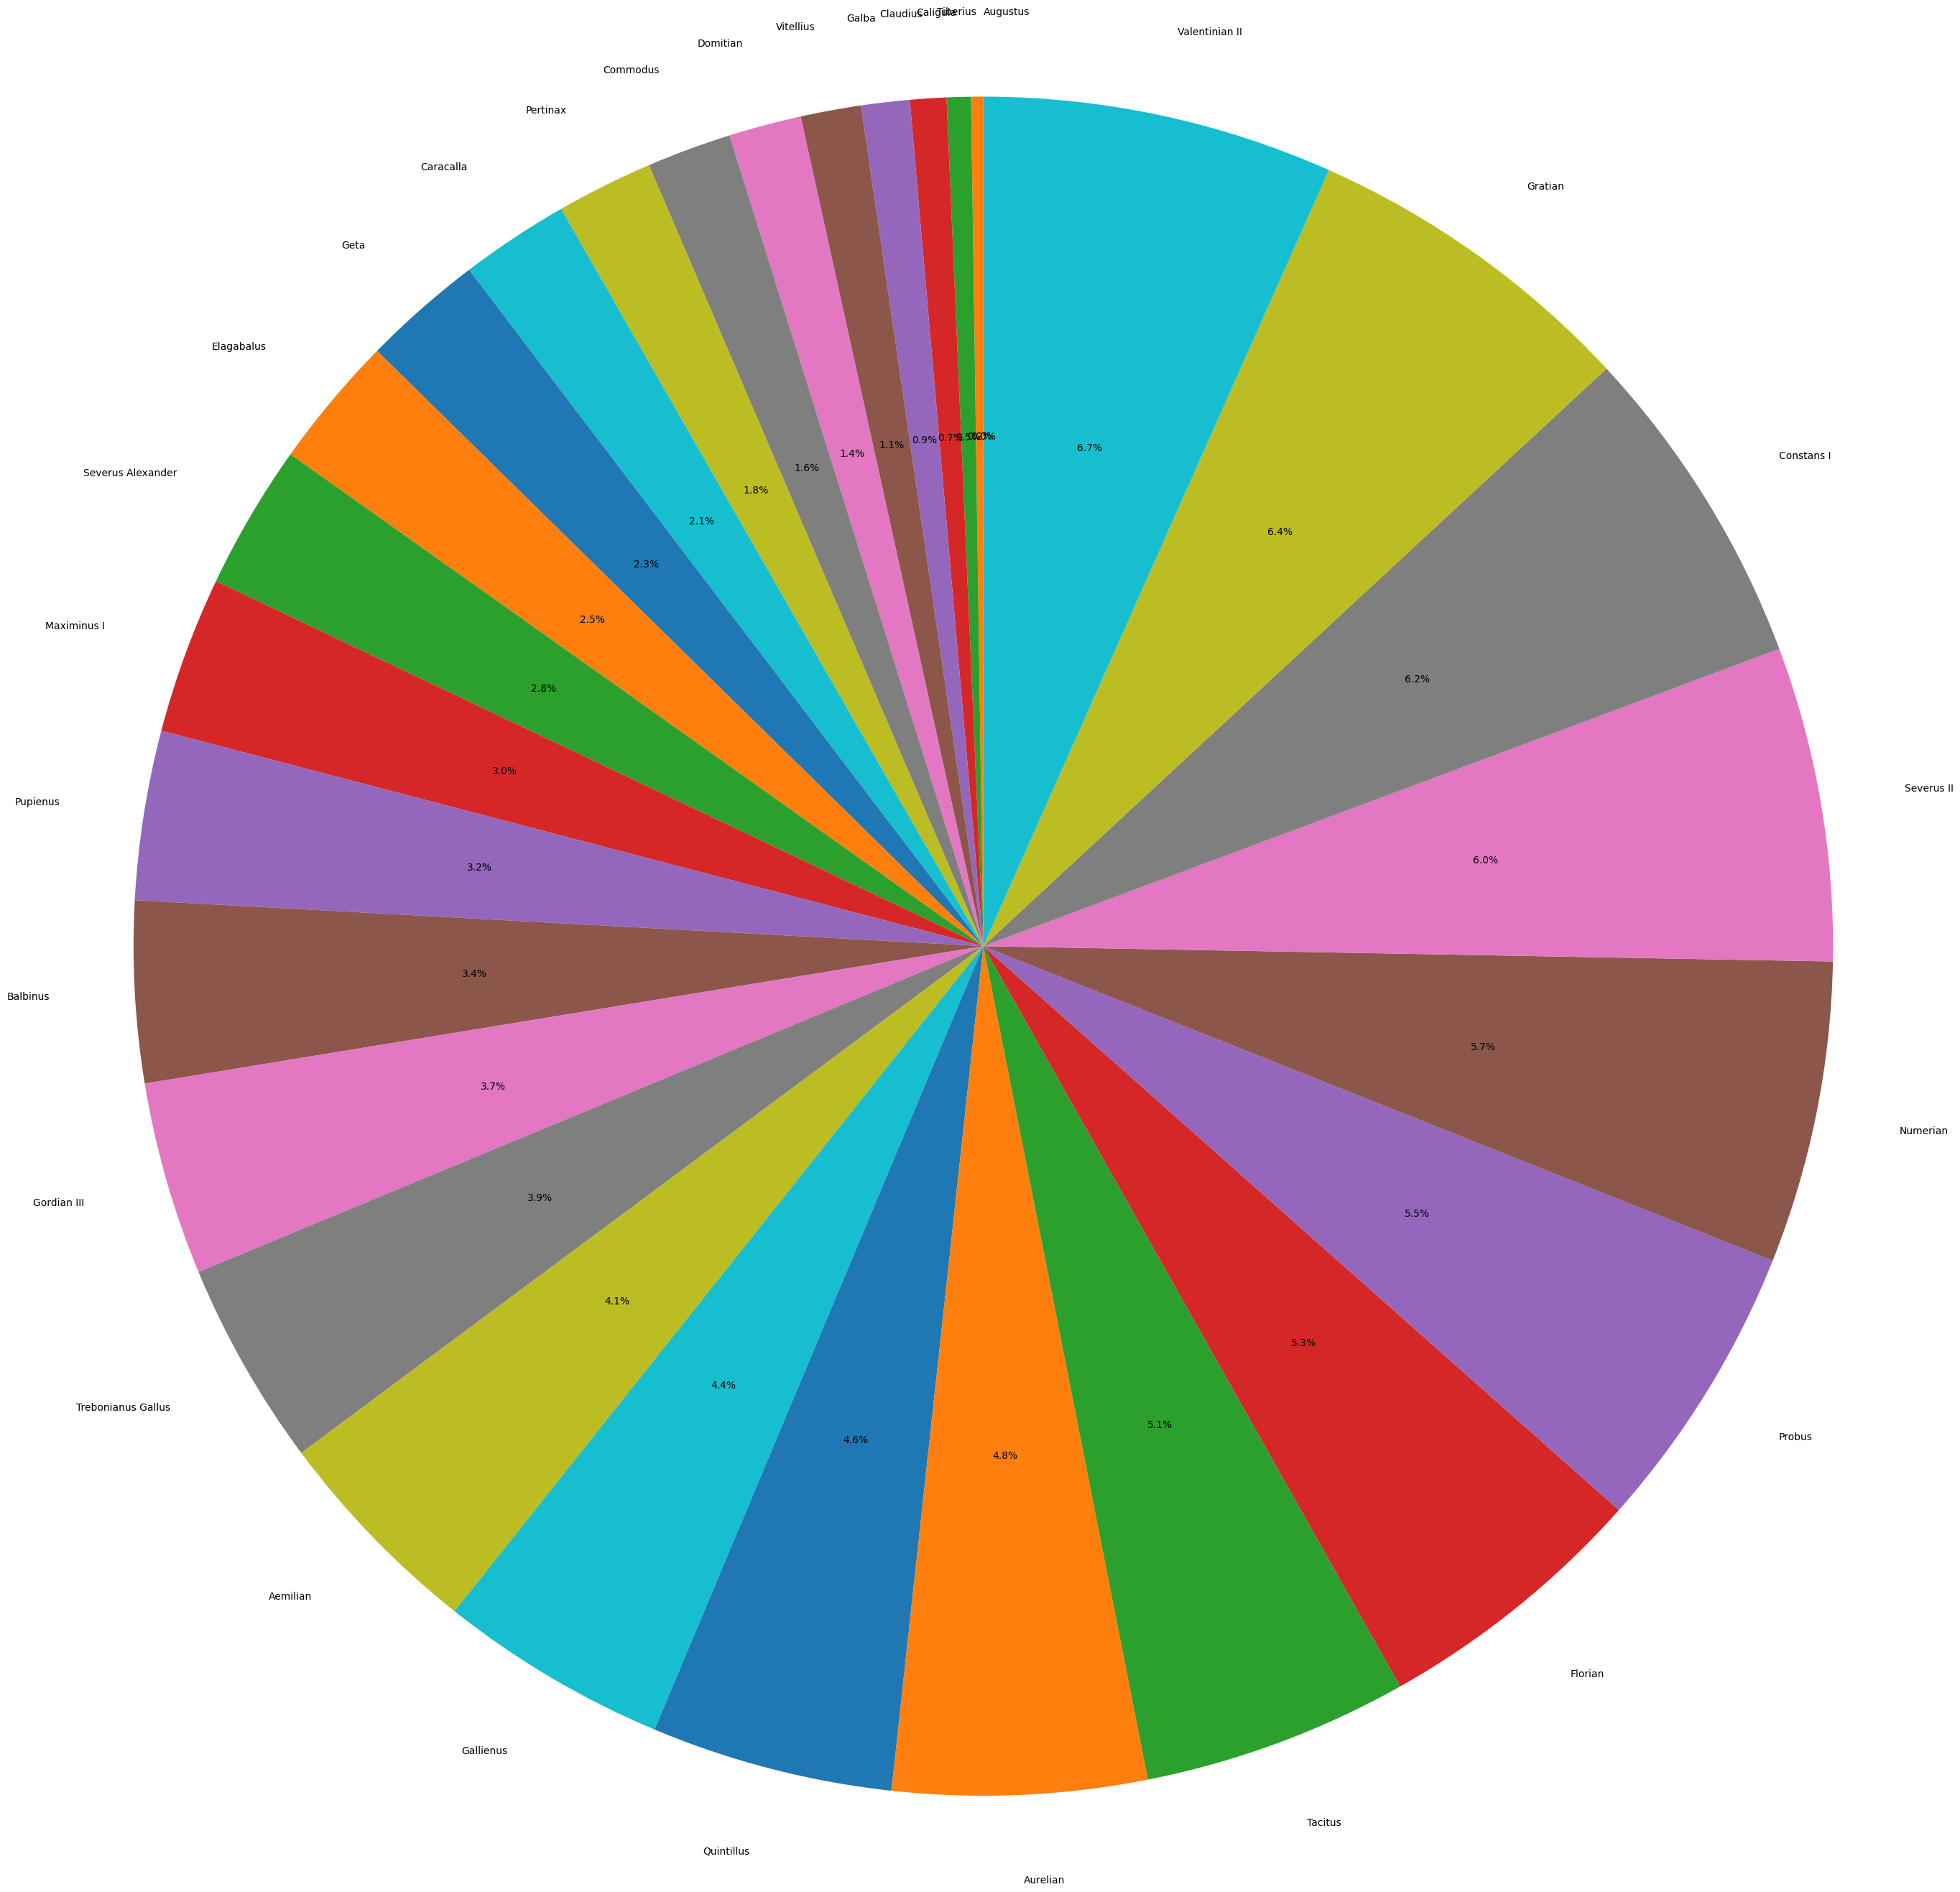

In [71]:
import matplotlib.pyplot as plt
import pandas as pd

roman_emperors = pd.read_csv('roman-emperor-reigns.csv')
assassinated_emperors = roman_emperors[
roman_emperors['Cause_of_Death'].apply(lambda x: 'assassinated' in x.lower())]

print(assassinated_emperors)
number_assassinated = len(assassinated_emperors)
print(number_assassinated)
other_deaths = len(roman_emperors) - number_assassinated
print(other_deaths)
emperor = assassinated_emperors["Emperor"]
cause_of_death = assassinated_emperors["Cause_of_Death"]
plt.pie(range(len(cause_of_death)), labels=emperor,autopct='%1.1f%%', startangle=90, radius=0.08 * 100)

#QUESTION 10

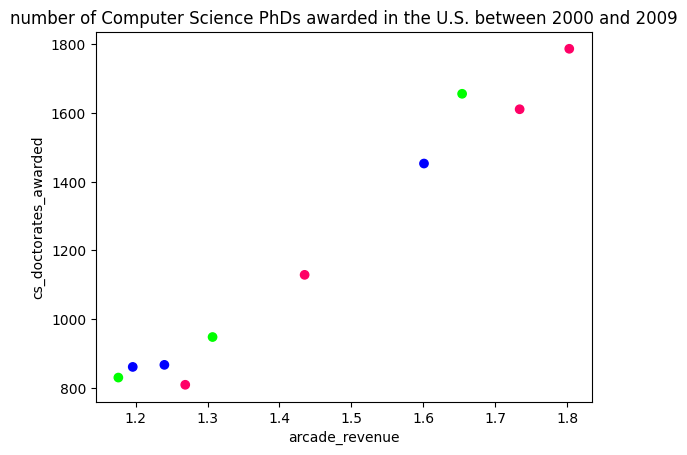

In [72]:
import pandas as pd
import matplotlib.pyplot as plt


arcade_revenue_cs_doctorates = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
arcade_revenue = arcade_revenue_cs_doctorates['Total Arcade Revenue (billions)'].values
cs_doctorates_awarded = arcade_revenue_cs_doctorates['Computer Science Doctorates Awarded (US)'].values
c=["#0000FF", "#00FF00", "#FF0066","#0000FF", "#00FF00", "#FF0066","#0000FF", "#00FF00", "#FF0066", "#FF0066"]

plt.scatter(arcade_revenue,cs_doctorates_awarded,color=c)
plt.title("number of Computer Science PhDs awarded in the U.S. between 2000 and 2009")
plt.xlabel("arcade_revenue")
plt.ylabel("cs_doctorates_awarded")
plt.show()